# Attention is All You Need

## The Transformer Model Architecture

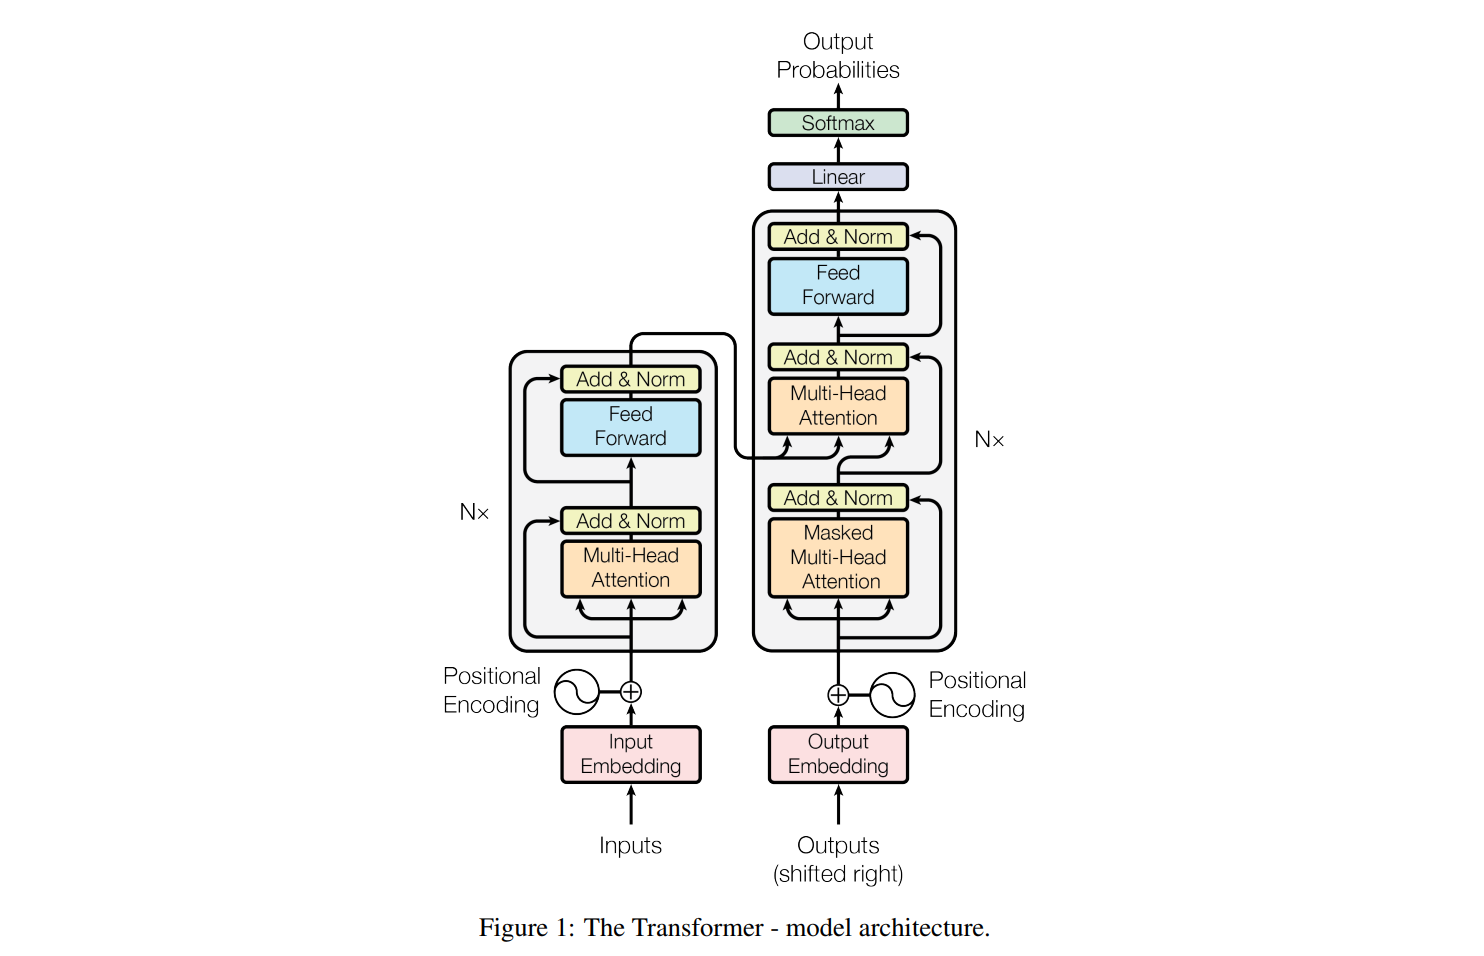

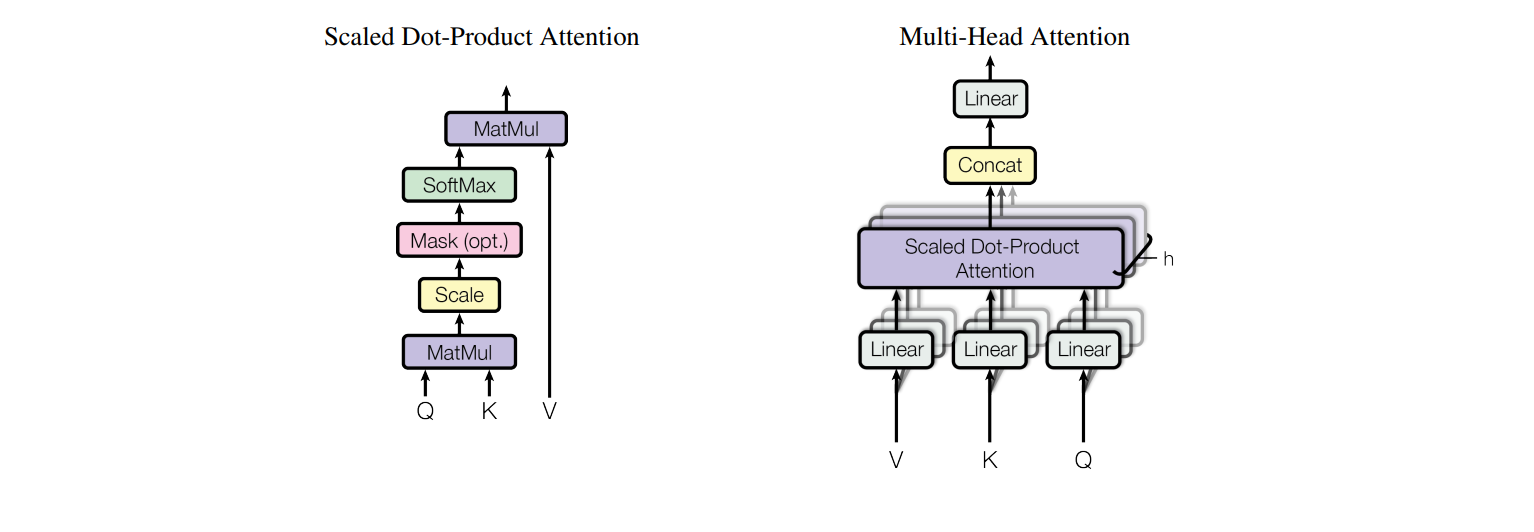

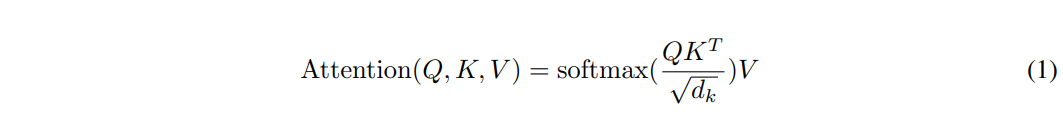

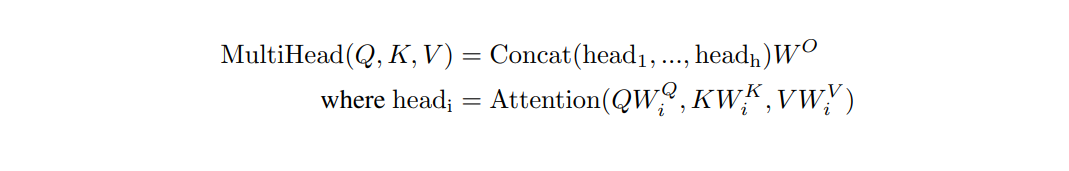

## Model Complexity
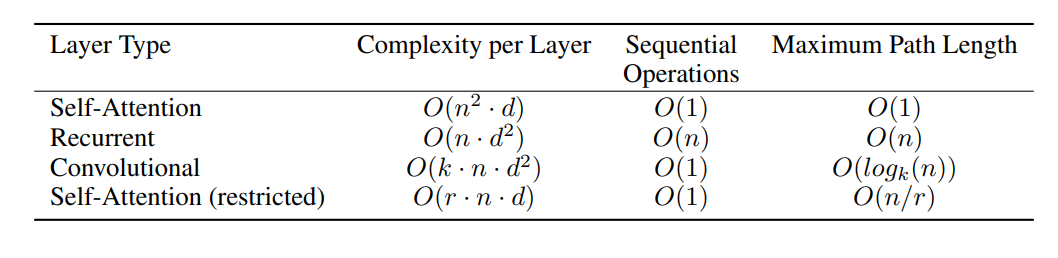

## Model Performance (as of 2017)
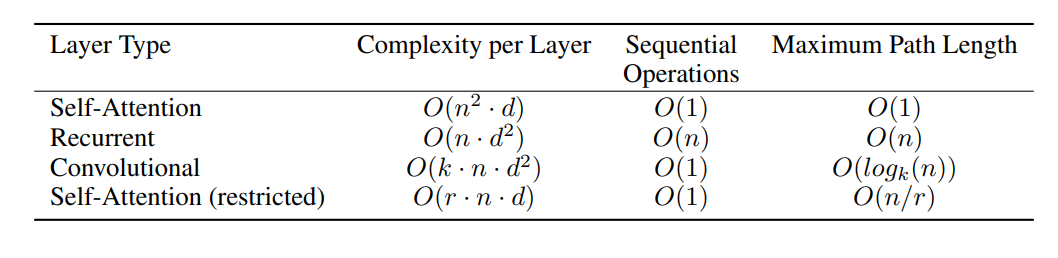

# Intuition

## Prerequisites
- One-hot encoding
- Dot product
- Matrix multiplication as a table lookup
- First & second order sequence models
- Second order sequence models with skips
- Masking

Pre-requisites

### One hot encoding
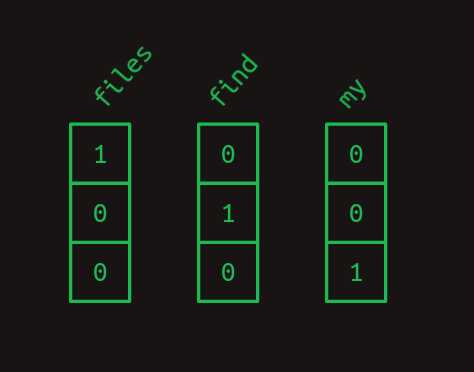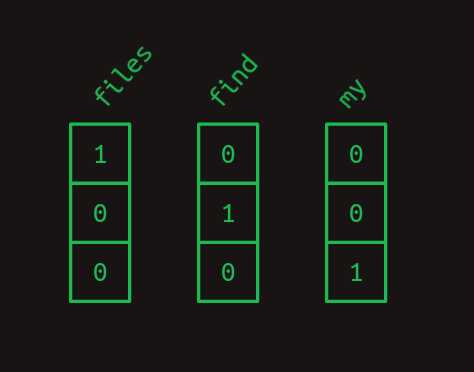

In [21]:
import torch
import torch.nn.functional as F

sentences = [
    ["the", "quick", "brown", "fox", "jumps"],
    ["the", "quick", "brown", "dog", "jumps"],
    ["the", "quick", "brown", "cat", "jumps"],
]

In [36]:
dictionary = {w:idx for idx, w in enumerate(sorted(set([w for sentence in sentences for w in sentence])))}
sentences_idx = [
    [dictionary[w] for w in sentence] for sentence in sentences
]
tensor_sentences = torch.tensor(sentences_idx, dtype=torch.long)
F.one_hot(tensor_sentences, num_classes=len(dictionary))

tensor([[[0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 1, 0],
         [1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 1, 0],
         [1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 1],
         [0, 0, 0, 0, 0, 1, 0],
         [1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0]]])

### Dot product
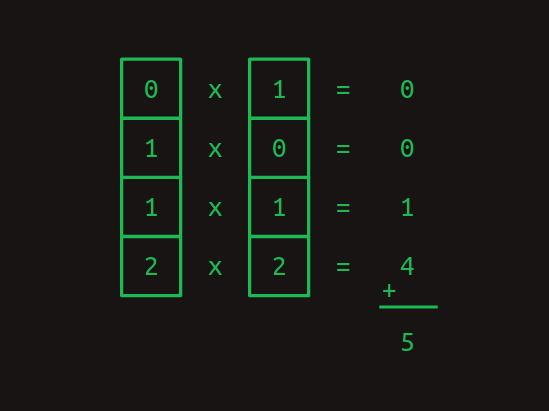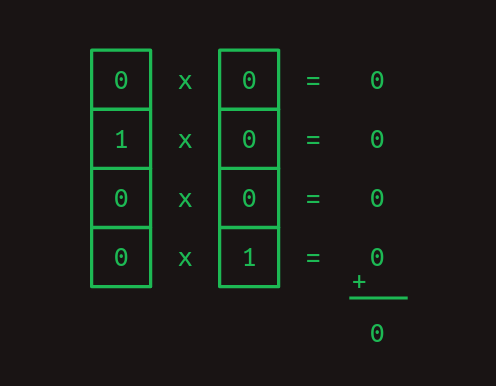

In [1]:
import numpy as np

a = np.array([0, 1, 1, 2])
b = np.array([1, 0, 1, 2])
ab_dot_product = a @ b
print(ab_dot_product)

a = np.array

5


In [29]:
sentences_idx_padded

[[6, 5, 0, 3, 4], [6, 5, 0, 2, 4], [6, 5, 0, 1, 4]]

[nltk_data] Downloading package words to /home/host/nltk_data...
[nltk_data]   Package words is already up-to-date!


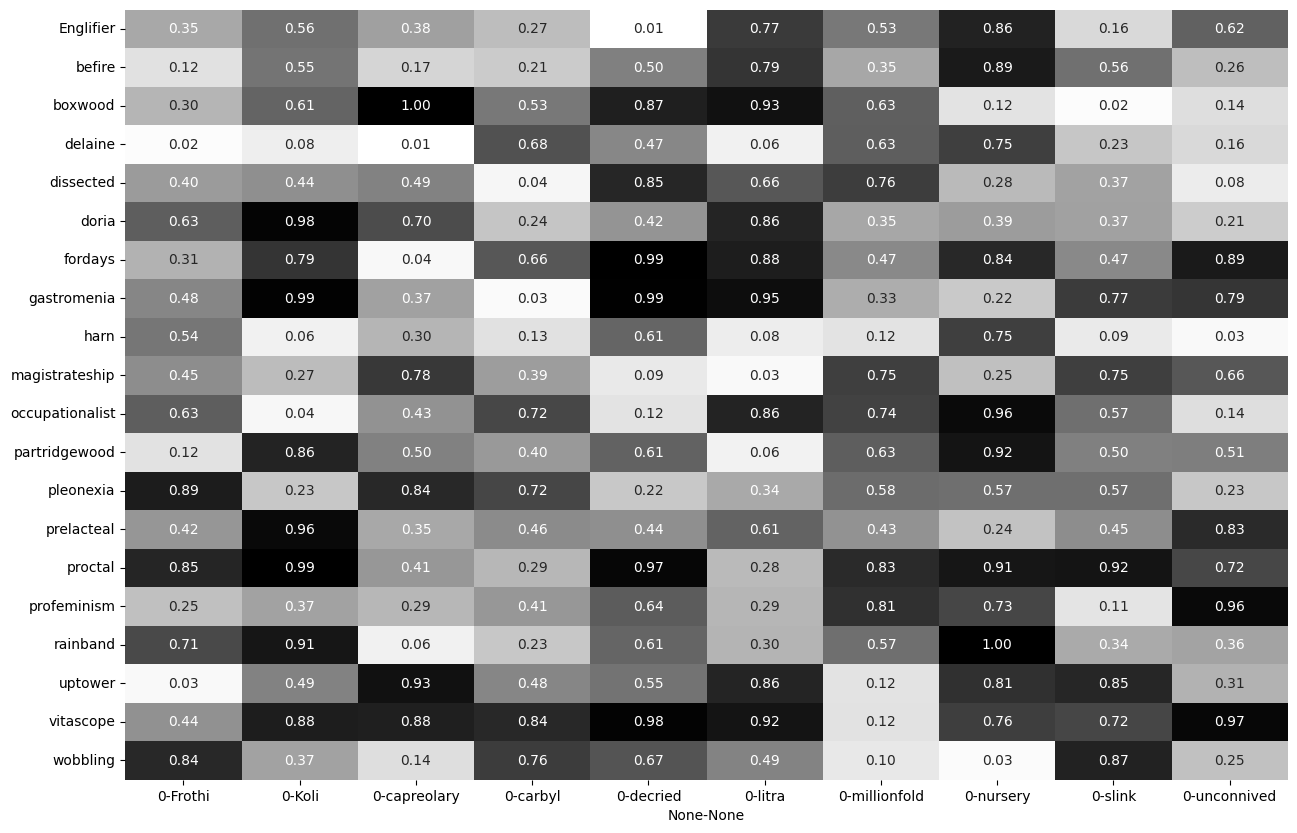

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from nltk.corpus import words

# Download words corpus if not already downloaded
import nltk
nltk.download('words')

# Get list of English words
english_words = words.words()

# Choose random words
x_values = random.sample(english_words, 20)
y_values = random.sample(english_words, 10)

data = {(x, y): np.random.rand() for x in x_values for y in y_values}

# Create a DataFrame from the dictionary
df = pd.DataFrame(list(data.values()), index=pd.MultiIndex.from_tuples(data.keys())).unstack(1)

# Use seaborn to create the heatmap with grayscale color
plt.figure(figsize=(15,10)) # Change figure size as needed
sns.heatmap(df, annot=True, cmap='binary', cbar=False, fmt='.2f')

# Show the plot
plt.show()


[nltk_data] Downloading package words to /home/host/nltk_data...
[nltk_data]   Package words is already up-to-date!


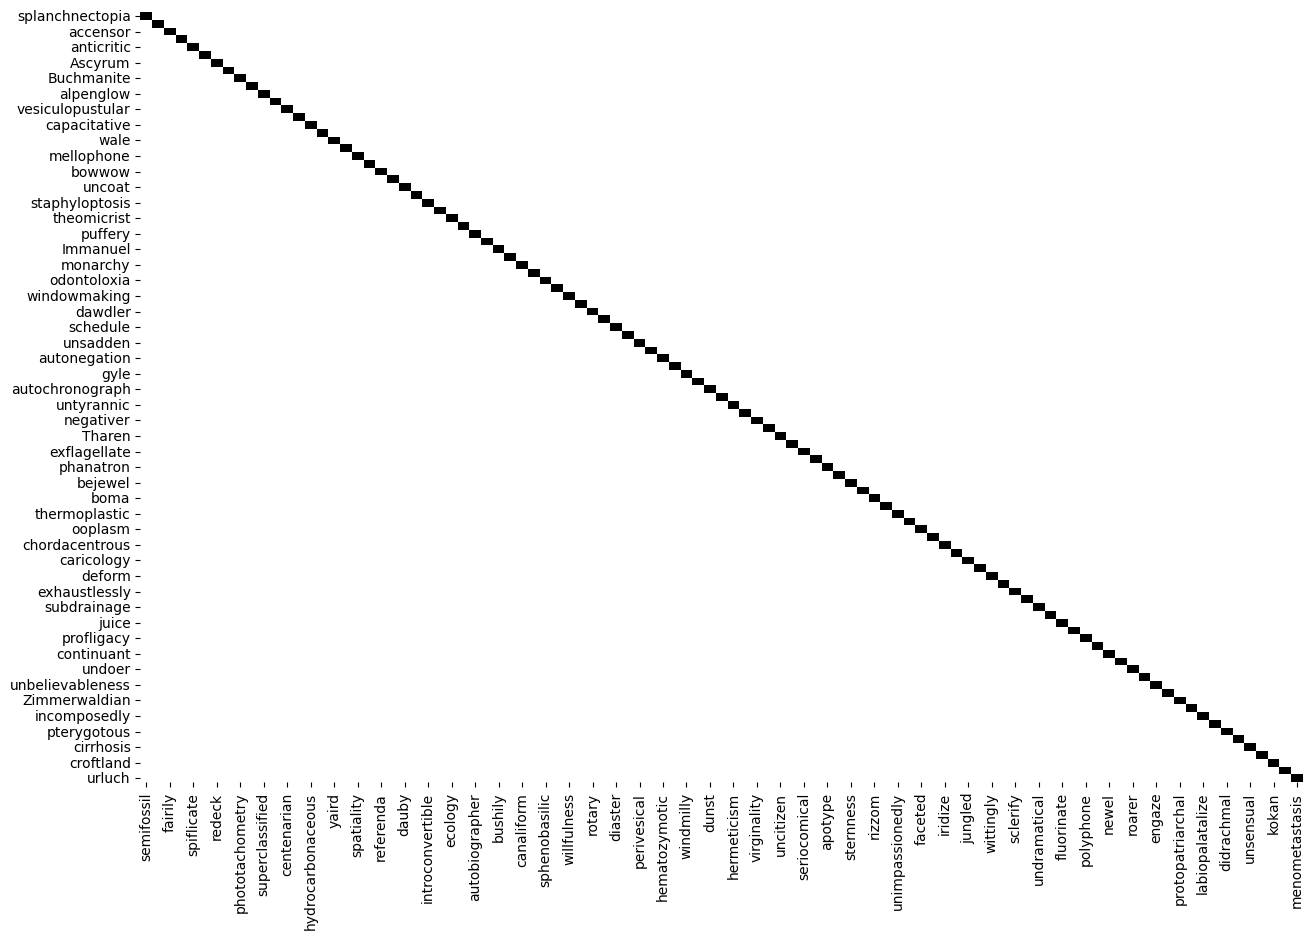

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from nltk.corpus import words
import nltk

nltk.download('words')

# Get list of English words
english_words = words.words()

# Choose random words
words_list = random.choices(english_words, k=100) # A sequence of words

# Generate first order sequence model (Markov chain)
model = {}
for i in range(1, len(words_list)):
    if words_list[i-1] not in model:
        model[words_list[i-1]] = {}
    if words_list[i] not in model[words_list[i-1]]:
        model[words_list[i-1]][words_list[i]] = 0
    model[words_list[i-1]][words_list[i]] += 1

# Normalize the counts to get probabilities
for word in model:
    total_count = sum(model[word].values())
    for target in model[word]:
        model[word][target] /= total_count

# Convert the model to a DataFrame for visualization
df = pd.DataFrame(model).fillna(0)

# Visualize with a heatmap
plt.figure(figsize=(15,10)) # Adjust as needed
sns.heatmap(df, cmap='binary', cbar=False)
plt.show()


[nltk_data] Downloading package words to /home/host/nltk_data...
[nltk_data]   Package words is already up-to-date!


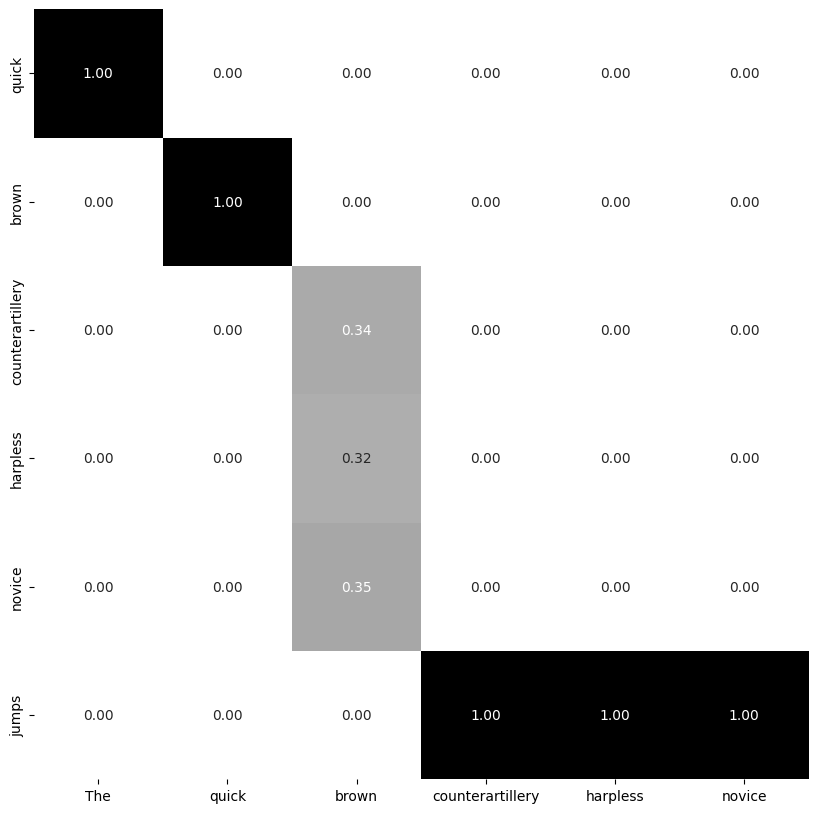

## First Order Sequence Model

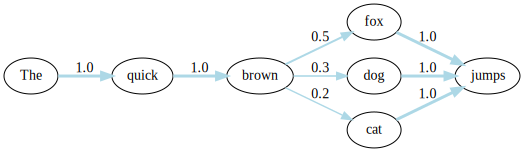

In [16]:
import graphviz as gv

# Set the fixed sentences
sentences = [
    ["The", "quick", "brown", "fox", "jumps"],
    ["The", "quick", "brown", "dog", "jumps"],
    ["The", "quick", "brown", "cat", "jumps"],
]

# First order sequence model
transition_probs = {
    "The": 1.0,
    "quick": 1.0,
    "brown": 1.0,
    "fox": 0.5,
    "dog": 0.3,
    "cat": 0.2,
    "jumps": 1.0
}

# Create a graph
graph = gv.Digraph(format='png')

# Generate the sequence model and create graph edges
model = {}
for sentence in sentences:
    for i in range(1, len(sentence)):
        # Add edge to graph
        if (sentence[i-1], sentence[i]) not in model:
            model[(sentence[i-1], sentence[i])] = True
            prob = transition_probs.get(sentence[i], '1.0')
            color = "#ADD8E6"  # Light blue color
            penwidth = str(1 + 2 * float(prob))  # Map probability to penwidth between 1 and 3
            graph.edge(sentence[i-1], sentence[i], label=f'{prob}', color=color, penwidth=penwidth)

# Rotate the graph to the left
graph.attr(rankdir='LR')

# To display the graph inline in a jupyter notebook
graph


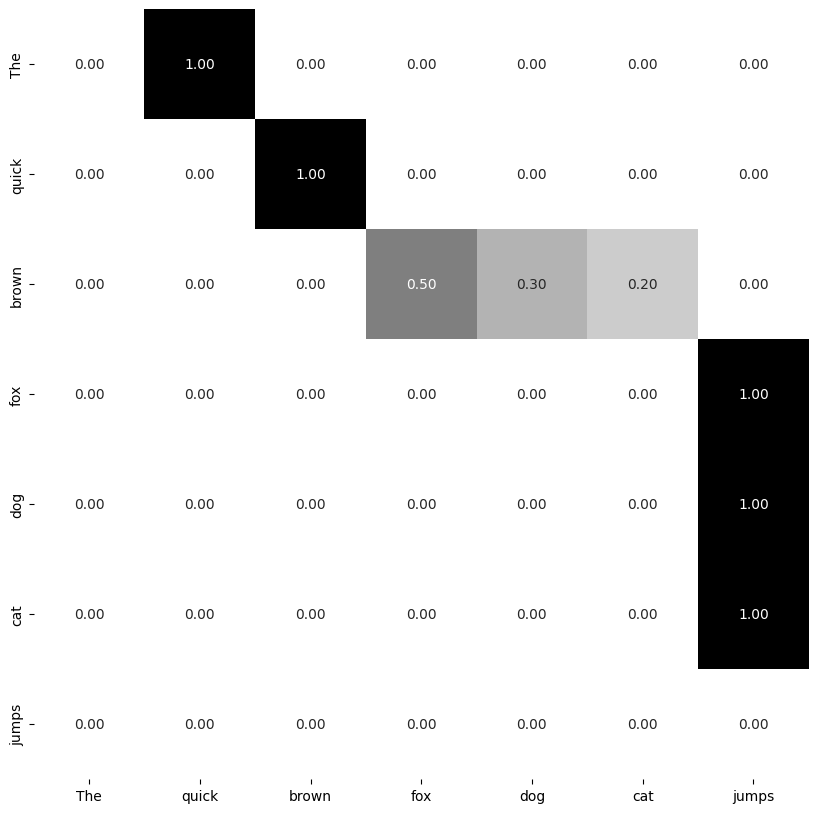

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sentences
sentences = [
    ["The", "quick", "brown", "fox", "jumps"],
    ["The", "quick", "brown", "dog", "jumps"],
    ["The", "quick", "brown", "cat", "jumps"],
]

# Transition probabilities
transition_probs = {
    "The": 1.0,
    "quick": 1.0,
    "brown": 1.0,
    "fox": 0.5,
    "dog": 0.3,
    "cat": 0.2,
    "jumps": 1.0
}

# Create a list of all unique words in the order they appear
words = ["The", "quick", "brown", "fox", "dog", "cat", "jumps"]

# Create a DataFrame filled with zeros
df = pd.DataFrame(0, index=words, columns=words)

# Fill the DataFrame with the transition probabilities
for sentence in sentences:
    for i in range(1, len(sentence)):
        df.loc[sentence[i-1], sentence[i]] = transition_probs.get(sentence[i], 1.0)

first_order_sequence_model = df.values

# Plot the DataFrame as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df, annot=True, cmap='binary', fmt='.2f', cbar=False)
plt.show()


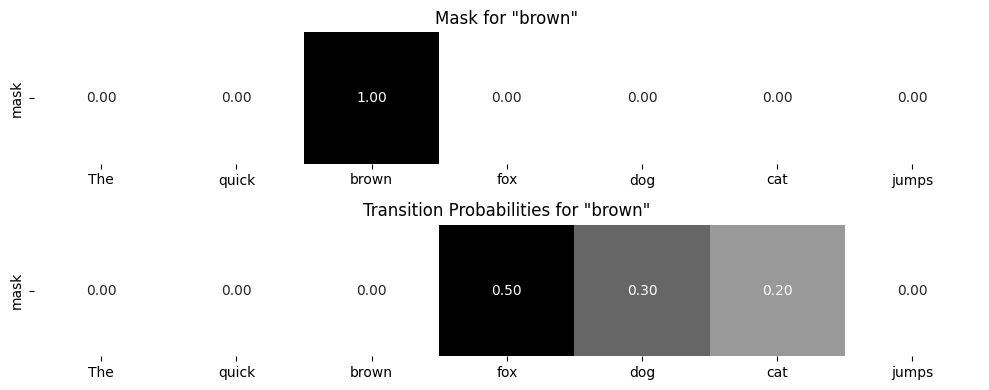

In [59]:
import numpy as np

# Create a binary mask for 'brown'
mask_brown = np.array([1 if word == 'brown' else 0 for word in words])

transition_probabilities_mask_brown = np.matmul(mask_brown, first_order_sequence_model)

# Convert the mask to a DataFrame for visualization
mask_df = pd.DataFrame(mask_brown, index=words, columns=['mask']).T

# Create a subplot to show the mask and the transition matrix
fig, axs = plt.subplots(2, figsize=(10, 4))

# Plot the mask
sns.heatmap(mask_df, annot=True, cmap='binary', fmt='.2f', cbar=False, ax=axs[0])
axs[0].set_title('Mask for "brown"')

# Plot the Probabilities
probs_df = pd.DataFrame(transition_probabilities_mask_brown, index=words, columns=['mask']).T
sns.heatmap(probs_df, annot=True, cmap='binary', fmt='.2f', cbar=False, ax=axs[1])
axs[1].set_title('Transition Probabilities for "brown"')

plt.tight_layout()
plt.show()


In [3]:
from manim import *


class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()
        square = Square()
        square.flip(RIGHT)
        square.rotate(-3 * TAU / 8)
        circle.set_fill(PINK, opacity=0.5)

        self.play(Create(square))
        self.play(Transform(square, circle))
        self.play(FadeOut(square))

ImportError: 

ManimPango could not import and load the necessary shared libraries.
This error may occur when ManimPango and its dependencies are improperly set up.
Please make sure the following versions are what you expect:

    * ManimPango v0.4.3, Python v3.10.9

If you believe there is a greater problem,
feel free to contact us or create an issue on GitHub:

    * Discord: https://www.manim.community/discord/
    * GitHub: https://github.com/ManimCommunity/ManimPango/issues

Original error: /lib/x86_64-linux-gnu/libgobject-2.0.so.0: undefined symbol: ffi_type_uint32, version LIBFFI_BASE_7.0
